In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import time
import joblib

# Import data

In [2]:
inputData = '~/data/Custom_Shuffled5e6_LHCbData_2016_MagUpDown_Dimuon_Ttracks.h5'

In [3]:
tickData = time.perf_counter()
df_Data = pd.read_hdf(inputData, key='LHCbData')
tockData = time.perf_counter()
print(f"Data imported found in {tockData - tickData:0.4f} seconds.")
df_Data

Data imported found in 8.7316 seconds.


,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_pim_PZ,DTF_FixJPsiLambda_p_PX,DTF_FixJPsiLambda_p_PY,DTF_FixJPsiLambda_p_PZ,DTF_FixJPsiLambda_mum_PX,DTF_FixJPsiLambda_mum_PY,DTF_FixJPsiLambda_mum_PZ,DTF_FixJPsiLambda_mup_PX,DTF_FixJPsiLambda_mup_PY,DTF_FixJPsiLambda_mup_PZ
0,0.925052,-0.678207,-9.309851,-341.755020,-530.188399,6303.036076,0.9250,-0.6782,-9.3093,-1234.491813,...,3419.468262,-1075.788208,-1689.151611,21112.339844,-3978.560791,-108.543556,48007.003906,26.626278,-1088.075684,8410.094727
1,0.658849,0.801886,-5.706660,270.115791,-5.721809,5951.895616,0.6578,0.8060,-5.8782,1010.379621,...,4606.895508,527.253235,22.888584,10623.878906,976.464844,-2947.226807,134395.078125,-92.054810,759.476013,41517.515625
2,0.555028,-0.524742,62.185736,-143.153318,-236.588826,7900.188126,0.5545,-0.5252,62.1887,-394.466553,...,3964.632080,-216.852493,-349.396210,11776.873047,485.530273,273.449402,7922.756836,-1488.140503,-3170.165527,16915.718750
3,0.463447,-0.489553,-83.704683,163.413343,330.928250,7921.420039,0.4637,-0.4896,-83.7049,360.417860,...,2596.411133,155.932739,319.795776,7613.910645,-1358.931274,-1017.899231,6752.110352,1242.073364,666.421265,5034.672852
4,0.792450,0.896142,-0.668591,280.008329,-146.317945,7849.805626,0.7924,0.8957,-0.6724,568.676267,...,3048.595215,654.741943,-443.179901,20916.388672,1467.532471,5086.734375,42974.617188,-1113.175659,3486.854980,44005.027344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001606,0.554408,-0.320514,-0.789850,97.053856,-18.271533,5611.693538,0.5555,-0.3197,-0.8036,1223.091828,...,-2164.362793,3759.524414,173.126114,1319.157104,-2942.756592,-143.585693,39838.800781,-936.231445,-2347.869873,24466.626953
5001607,0.554568,-0.320382,-0.791936,107.030048,-26.437617,6302.106746,0.5555,-0.3197,-0.8036,1165.732118,...,20081.597656,-347.772369,-1881.749146,-14263.262695,-3088.154785,-240.237930,42668.664062,-1043.608887,-2431.440674,26848.666016
5001608,0.773464,-0.018334,13.879051,-0.479735,71.897004,6058.278197,0.7732,-0.0188,13.8783,-313.798984,...,3214.545654,15.401960,306.569153,8265.916992,-900.349731,1434.200317,9202.686523,284.854431,-1285.101929,13390.396484
5001609,0.873826,-0.167370,24.378388,73.077364,-45.271725,6071.281366,0.8740,-0.1671,24.3759,587.754243,...,3362.854004,-256.420624,-52.991135,7987.394531,-2700.916260,-323.784729,41375.183594,862.345825,-345.342651,12463.309570


## Integrate missing features

In [4]:
def MomentumModulus(px, py, pz):
    return np.sqrt(px**2 + py**2 + pz**2)

def TransverseMomentumModulus(px, py):
    return np.sqrt(px**2 + py**2)

In [5]:
df_Data = df_Data.assign(
    p_PT = TransverseMomentumModulus(df_Data['p_PX'],df_Data['p_PY']),
    DTF_FixJPsi_p_PT = TransverseMomentumModulus(df_Data['DTF_FixJPsi_p_PX'], df_Data['DTF_FixJPsi_p_PY']),
    DTF_FixJPsiLambda_p_PT = TransverseMomentumModulus(df_Data['DTF_FixJPsiLambda_p_PX'], df_Data['DTF_FixJPsiLambda_p_PY']),
    pim_PT = TransverseMomentumModulus(df_Data['pim_PX'],df_Data['pim_PY']),
    DTF_FixJPsi_pim_PT = TransverseMomentumModulus(df_Data['DTF_FixJPsi_pim_PX'], df_Data['DTF_FixJPsi_pim_PY']),
    DTF_FixJPsiLambda_pim_PT = TransverseMomentumModulus(df_Data['DTF_FixJPsiLambda_pim_PX'], df_Data['DTF_FixJPsiLambda_pim_PY']),
    Jpsi_PT = TransverseMomentumModulus(df_Data['Jpsi_PX'],df_Data['Jpsi_PY'])
)

df_Data

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_mup_PX,DTF_FixJPsiLambda_mup_PY,DTF_FixJPsiLambda_mup_PZ,p_PT,DTF_FixJPsi_p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsi_pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT
0,0.925052,-0.678207,-9.309851,-341.755020,-530.188399,6303.036076,0.9250,-0.6782,-9.3093,-1234.491813,...,26.626278,-1088.075684,8410.094727,1838.123436,2388.441895,2002.636597,631.990184,603.600525,442.353149,4222.937881
1,0.658849,0.801886,-5.706660,270.115791,-5.721809,5951.895616,0.6578,0.8060,-5.8782,1010.379621,...,-92.054810,759.476013,41517.515625,1288.407362,564.582581,527.749817,265.160669,213.536026,159.984573,2360.397452
2,0.555028,-0.524742,62.185736,-143.153318,-236.588826,7900.188126,0.5545,-0.5252,62.1887,-394.466553,...,-1488.140503,-3170.165527,16915.718750,607.090191,310.837036,411.221008,139.097613,147.180145,146.397705,3064.827444
3,0.463447,-0.489553,-83.704683,163.413343,330.928250,7921.420039,0.4637,-0.4896,-83.7049,360.417860,...,1242.073364,666.421265,5034.672852,544.419101,257.022369,355.786957,235.416458,174.329514,117.761795,238.811089
4,0.792450,0.896142,-0.668591,280.008329,-146.317945,7849.805626,0.7924,0.8957,-0.6724,568.676267,...,-1113.175659,3486.854980,44005.027344,451.662792,639.843689,790.629761,230.630541,155.682144,201.640015,8381.333980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001606,0.554408,-0.320514,-0.789850,97.053856,-18.271533,5611.693538,0.5555,-0.3197,-0.8036,1223.091828,...,-936.231445,-2347.869873,24466.626953,1502.236255,313.611359,3763.508545,112.138097,467.593414,1825.850342,5091.197992
5001607,0.554568,-0.320382,-0.791936,107.030048,-26.437617,6302.106746,0.5555,-0.3197,-0.8036,1165.732118,...,-1043.608887,-2431.440674,26848.666016,1798.265754,380.220673,1913.615723,112.138097,1102.986694,1492.622314,5091.197992
5001608,0.773464,-0.018334,13.879051,-0.479735,71.897004,6058.278197,0.7732,-0.0188,13.8783,-313.798984,...,284.854431,-1285.101929,13390.396484,1156.689174,2051.073730,306.955811,288.860767,2000.975342,187.409241,635.638121
5001609,0.873826,-0.167370,24.378388,73.077364,-45.271725,6071.281366,0.8740,-0.1671,24.3759,587.754243,...,862.345825,-345.342651,12463.309570,1047.961973,519.036377,261.838898,432.656324,286.640015,391.688782,1970.210337


# Import BDT
Using VF BDT for now.

In [7]:
daughterMomenta = 'VF'
BDTSavedStatePath = 'saved_states/BDT_VF_0.1_4_3_200_0.7.joblib'

tickBDTImport = time.perf_counter()
BDT = joblib.load(BDTSavedStatePath)
tockBDTImport = time.perf_counter()
print(f"BDT imported in {(tockBDTImport - tickBDTImport):0.4f} seconds.")

BDT imported in 0.4522 seconds.


In [8]:
if daughterMomenta == 'VF':
    pMomenta = ['p_PT', 'p_PZ']
    pimMomenta = ['pim_PT', 'pim_PZ']
elif daughterMomenta == 'DTF':
    pMomenta = ['DTF_FixJPsi_p_PT', 'DTF_FixJPsi_p_PZ']
    pimMomenta = ['DTF_FixJPsi_pim_PT', 'DTF_FixJPsi_pim_PZ']
elif daughterMomenta == 'DTFL':
    pMomenta = ['DTF_FixJPsiLambda_p_PT', 'DTF_FixJPsiLambda_p_PZ']
    pimMomenta = ['DTF_FixJPsiLambda_pim_PT', 'DTF_FixJPsiLambda_pim_PZ']
elif daughterMomenta == 'NO':
    pMomenta = []
    pimMomenta = []
else:
    raise ValueError(daughterMomenta + " is not a valid option for momenta usage.")

In [9]:
fixedFeatures = [
    'Jpsi_PT',
    'Jpsi_PZ',
    'L_ENDVERTEX_X',
    'L_ENDVERTEX_Y',
    'L_ENDVERTEX_Z',
    'L_BPVDIRA',
    'Lb_BPVDIRA',
    'L_VFASPF_CHI2_VDOF',
    'Lb_VFASPF_CHI2_VDOF',
    'L_BPVIPCHI2',
    'Lb_BPVIPCHI2',
    'L_BPVVDCHI2',
    'Lb_BPVVDCHI2',
    'DTF_FixJPsi_status',
    'DTF_FixJPsiLambda_status'
]

In [10]:
features = pMomenta + pimMomenta + fixedFeatures

In [11]:
X_predict = df_Data.loc[:, features].to_numpy()
X_predict

array([[1.83812344e+03, 2.05145157e+04, 6.31990184e+02, ...,
        1.10083115e+03, 0.00000000e+00, 0.00000000e+00],
       [1.28840736e+03, 1.53550712e+04, 2.65160669e+02, ...,
        2.15737337e+03, 0.00000000e+00, 1.00000000e+00],
       [6.07090191e+02, 1.50798547e+04, 1.39097613e+02, ...,
        1.22749758e+03, 0.00000000e+00, 3.00000000e+00],
       ...,
       [1.15668917e+03, 1.98178630e+04, 2.88860767e+02, ...,
        8.69124432e+01, 0.00000000e+00, 1.00000000e+00],
       [1.04796197e+03, 1.90343734e+04, 4.32656324e+02, ...,
        2.92375111e+01, 0.00000000e+00, 1.00000000e+00],
       [6.48689439e+02, 2.90579902e+04, 7.29218446e+01, ...,
        2.48512631e+02, 1.00000000e+00, 1.00000000e+00]])

In [12]:
tickBDTPredict = time.perf_counter()
Y_proba_predicted = BDT.predict_proba(X_predict)[:,1]
tockBDTPredict = time.perf_counter()
print(f"BDT imported in {(tockBDTPredict - tickBDTPredict):0.4f} seconds.")

BDT imported in 20.9908 seconds.


In [13]:
Y_proba_predicted

array([0.02146475, 0.0014651 , 0.00121076, ..., 0.00058558, 0.00080167,
       0.00894824])

In [14]:
df_Data = df_Data.assign(
    BDT_output = Y_proba_predicted,
)

df_Data

,Lb_ENDVERTEX_X,Lb_ENDVERTEX_Y,Lb_ENDVERTEX_Z,L_ENDVERTEX_X,L_ENDVERTEX_Y,L_ENDVERTEX_Z,Jpsi_ENDVERTEX_X,Jpsi_ENDVERTEX_Y,Jpsi_ENDVERTEX_Z,L_PX,...,DTF_FixJPsiLambda_mup_PY,DTF_FixJPsiLambda_mup_PZ,p_PT,DTF_FixJPsi_p_PT,DTF_FixJPsiLambda_p_PT,pim_PT,DTF_FixJPsi_pim_PT,DTF_FixJPsiLambda_pim_PT,Jpsi_PT,BDT_output
0,0.925052,-0.678207,-9.309851,-341.755020,-530.188399,6303.036076,0.9250,-0.6782,-9.3093,-1234.491813,...,-1088.075684,8410.094727,1838.123436,2388.441895,2002.636597,631.990184,603.600525,442.353149,4222.937881,0.021465
1,0.658849,0.801886,-5.706660,270.115791,-5.721809,5951.895616,0.6578,0.8060,-5.8782,1010.379621,...,759.476013,41517.515625,1288.407362,564.582581,527.749817,265.160669,213.536026,159.984573,2360.397452,0.001465
2,0.555028,-0.524742,62.185736,-143.153318,-236.588826,7900.188126,0.5545,-0.5252,62.1887,-394.466553,...,-3170.165527,16915.718750,607.090191,310.837036,411.221008,139.097613,147.180145,146.397705,3064.827444,0.001211
3,0.463447,-0.489553,-83.704683,163.413343,330.928250,7921.420039,0.4637,-0.4896,-83.7049,360.417860,...,666.421265,5034.672852,544.419101,257.022369,355.786957,235.416458,174.329514,117.761795,238.811089,0.001478
4,0.792450,0.896142,-0.668591,280.008329,-146.317945,7849.805626,0.7924,0.8957,-0.6724,568.676267,...,3486.854980,44005.027344,451.662792,639.843689,790.629761,230.630541,155.682144,201.640015,8381.333980,0.004200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5001606,0.554408,-0.320514,-0.789850,97.053856,-18.271533,5611.693538,0.5555,-0.3197,-0.8036,1223.091828,...,-2347.869873,24466.626953,1502.236255,313.611359,3763.508545,112.138097,467.593414,1825.850342,5091.197992,0.021321
5001607,0.554568,-0.320382,-0.791936,107.030048,-26.437617,6302.106746,0.5555,-0.3197,-0.8036,1165.732118,...,-2431.440674,26848.666016,1798.265754,380.220673,1913.615723,112.138097,1102.986694,1492.622314,5091.197992,0.045986
5001608,0.773464,-0.018334,13.879051,-0.479735,71.897004,6058.278197,0.7732,-0.0188,13.8783,-313.798984,...,-1285.101929,13390.396484,1156.689174,2051.073730,306.955811,288.860767,2000.975342,187.409241,635.638121,0.000586
5001609,0.873826,-0.167370,24.378388,73.077364,-45.271725,6071.281366,0.8740,-0.1671,24.3759,587.754243,...,-345.342651,12463.309570,1047.961973,519.036377,261.838898,432.656324,286.640015,391.688782,1970.210337,0.000802


## Explore selected results

In [34]:
plum = '#6e304b'
apricot = '#e2ae6c'
threshold = 0.76

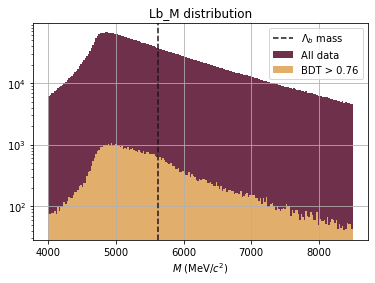

In [35]:
massToPlot = 'Lb_M'
massRange = (4000,8500)

plt.hist(df_Data[massToPlot],bins=200,
         range=massRange, color=plum, alpha=1, label="All data", density=False)
plt.hist(df_Data.loc[df_Data['BDT_output'] > threshold, massToPlot],bins=200,
         range=massRange, color=apricot, alpha=1, label="BDT > " + str(threshold), density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title(massToPlot + " distribution")
plt.axvline(5620.2, color='#22161c', linestyle='--', label='$\Lambda_b$ mass')
plt.legend()
plt.show()

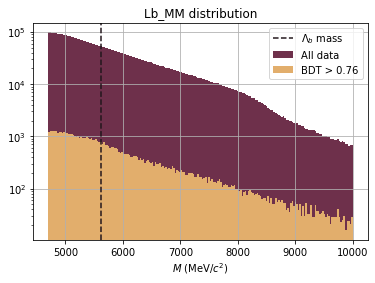

In [36]:
massToPlot = 'Lb_MM'
massRange = (min(df_Data[massToPlot]), 10000)

plt.hist(df_Data[massToPlot],bins=200,
         range=massRange, color=plum, alpha=1, label="All data", density=False)
plt.hist(df_Data.loc[df_Data['BDT_output'] > threshold, massToPlot],bins=200,
         range=massRange, color=apricot, alpha=1, label="BDT > " + str(threshold), density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title(massToPlot + " distribution")
plt.axvline(5620.2, color='#22161c', linestyle='--', label='$\Lambda_b$ mass')
plt.legend()
plt.show()

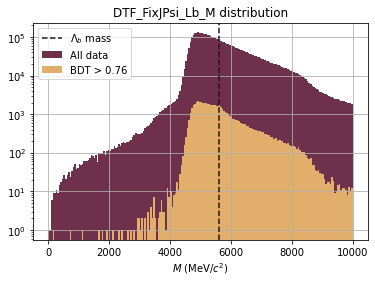

In [37]:
massToPlot = 'DTF_FixJPsi_Lb_M'
massRange = (0, 10000)

plt.hist(df_Data[massToPlot],bins=200,
         range=massRange, color=plum, alpha=1, label="All data", density=False)
plt.hist(df_Data.loc[df_Data['BDT_output'] > threshold, massToPlot],bins=200,
         range=massRange, color=apricot, alpha=1, label="BDT > " + str(threshold), density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title(massToPlot + " distribution")
plt.axvline(5620.2, color='#22161c', linestyle='--', label='$\Lambda_b$ mass')
plt.legend()
plt.show()

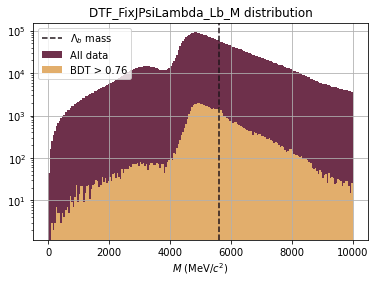

In [38]:
massToPlot = 'DTF_FixJPsiLambda_Lb_M'
massRange = (0, 10000)

plt.hist(df_Data[massToPlot],bins=200,
         range=massRange, color=plum, alpha=1, label="All data", density=False)
plt.hist(df_Data.loc[df_Data['BDT_output'] > threshold, massToPlot],bins=200,
         range=massRange, color=apricot, alpha=1, label="BDT > " + str(threshold), density=False)
plt.grid()
plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title(massToPlot + " distribution")
plt.axvline(5620.2, color='#22161c', linestyle='--', label='$\Lambda_b$ mass')
plt.legend()
plt.show()

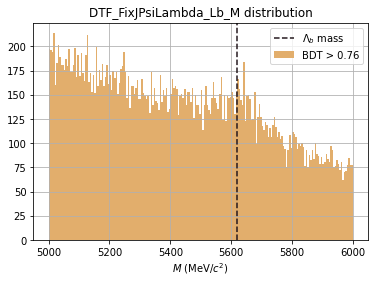

In [39]:
plt.hist(df_Data.loc[df_Data['BDT_output'] > threshold, massToPlot],bins=200,
         range=(5000,6000), color=apricot, alpha=1, label="BDT > " + str(threshold), density=False)
plt.grid()
#plt.yscale('log')
plt.xlabel("$M$ (MeV/$c^2$)")
plt.title(massToPlot + " distribution")
plt.axvline(5620.2, color='#22161c', linestyle='--', label='$\Lambda_b$ mass')
plt.legend()
plt.show()